# 

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import scipy.stats as stats
from scipy.linalg import eigh
import pickle
from itertools import product

In [2]:
from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.PLSFaultDetector import PLSFaultDetector 
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm 
from utils_ import plot_all_roc_curves

In [3]:
from fast_dataset_open import open_with_cache

In [53]:
import importlib
import fault_detection_algorithms.PCAFaultDetector
import fault_detection_algorithms.PLSFaultDetector
import fault_detection_algorithms.fault_detector
import utils_

importlib.reload(fault_detection_algorithms.PCAFaultDetector)
importlib.reload(fault_detection_algorithms.PLSFaultDetector)
importlib.reload(fault_detection_algorithms.fault_detector)
importlib.reload(utils_)

from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.PLSFaultDetector import PLSFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm
from utils_ import plot_all_roc_curves


In [5]:
# constants
datasets_dir = "datasets"
dataset_dir = f"./{datasets_dir}/TEP/"

In [6]:
X_columns= [ 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']

In [7]:
test_df = open_with_cache(f"{dataset_dir}/TEP_Faulty_Testing.RData", f"{dataset_dir}/TEP_FaultFree_Testing.RData")

Loading from cache: cache_data/38ed105d1e51ef36e954d9df89414b6e.pkl


In [56]:
model_pca = BaseFaultDetectionAlgorithm.load("models/pca_fault_detector.pickle")
#model_pca.J_th_SPE = 37.03911226962255
#model_pca.J_th_T2 = 51.421568332998696

In [57]:
model_pls = BaseFaultDetectionAlgorithm.load("models/pls_fault_detector.pickle")

In [34]:
x_test = test_df[X_columns].values

In [54]:
expected_fault = test_df["sample"]>160
expected_fault[test_df["faultNumber"]==0] = False# non faulty test

In [58]:

result_pls = model_pca.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:143: RuntimeWarning: invalid value encountered in scalar divide
  "Fault Detection Rate": TP / (TP + FN),
/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:144: RuntimeWarning: invalid value encountered in scalar divide
  "False Detection Rate": FP / (TP + FP),


In [12]:
result_pls = model_pls.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:143: RuntimeWarning: invalid value encountered in scalar divide
  "Fault Detection Rate": TP / (TP + FN),


In [59]:
print("Global")
print(f"FAR(false alarm rate) {result_pls['global']['False Alarm Rate']}" )
print(f"TDR(fault detection rate) {result_pls['global']['Fault Detection Rate']}" )
print(f"FDR(false detection rate) {result_pls['global']['False Detection Rate']}" )
print()

ordering = [0, 1,2,4,5,6,7,8,12,13,14,17,18,10,11,16,19,20, 3,9,15]
#ordering = [0, 8, 9,10, 11, 12, 13, 1,2,4,6,7,17,18,20,3,5,14,15,16,19]
for fault_num in ordering:
    metrics = result_pls["by_fault"][fault_num]
    print(f"Fault: {fault_num}")
    if fault_num==0:
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    else:
        print(f"TDR(fault detection rate) {metrics['Fault Detection Rate']}" )
        print(f"FDR(false detection rate) {metrics['False Detection Rate']}" )
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    print()


Global
FAR(false alarm rate) 0.007482211538461538
TDR(fault detection rate) 0.635389125
FDR(false detection rate) 0.003052361044318172

Fault: 0
FAR(false alarm rate) 0.01050625

Fault: 1
TDR(fault detection rate) 0.99694
FDR(false detection rate) 0.001317298686207432
FAR(false alarm rate) 0.006575

Fault: 2
TDR(fault detection rate) 0.98347
FDR(false detection rate) 0.0013353168458089836
FAR(false alarm rate) 0.006575

Fault: 4
TDR(fault detection rate) 0.9979325
FDR(false detection rate) 0.0013159902826877226
FAR(false alarm rate) 0.006575

Fault: 5
TDR(fault detection rate) 0.2394325
FDR(false detection rate) 0.005462154331820683
FAR(false alarm rate) 0.006575

Fault: 6
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.0013132730459445828
FAR(false alarm rate) 0.006575

Fault: 7
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.0013132730459445828
FAR(false alarm rate) 0.006575

Fault: 8
TDR(fault detection rate) 0.969725
FDR(false detection rate) 0.00135421815785137

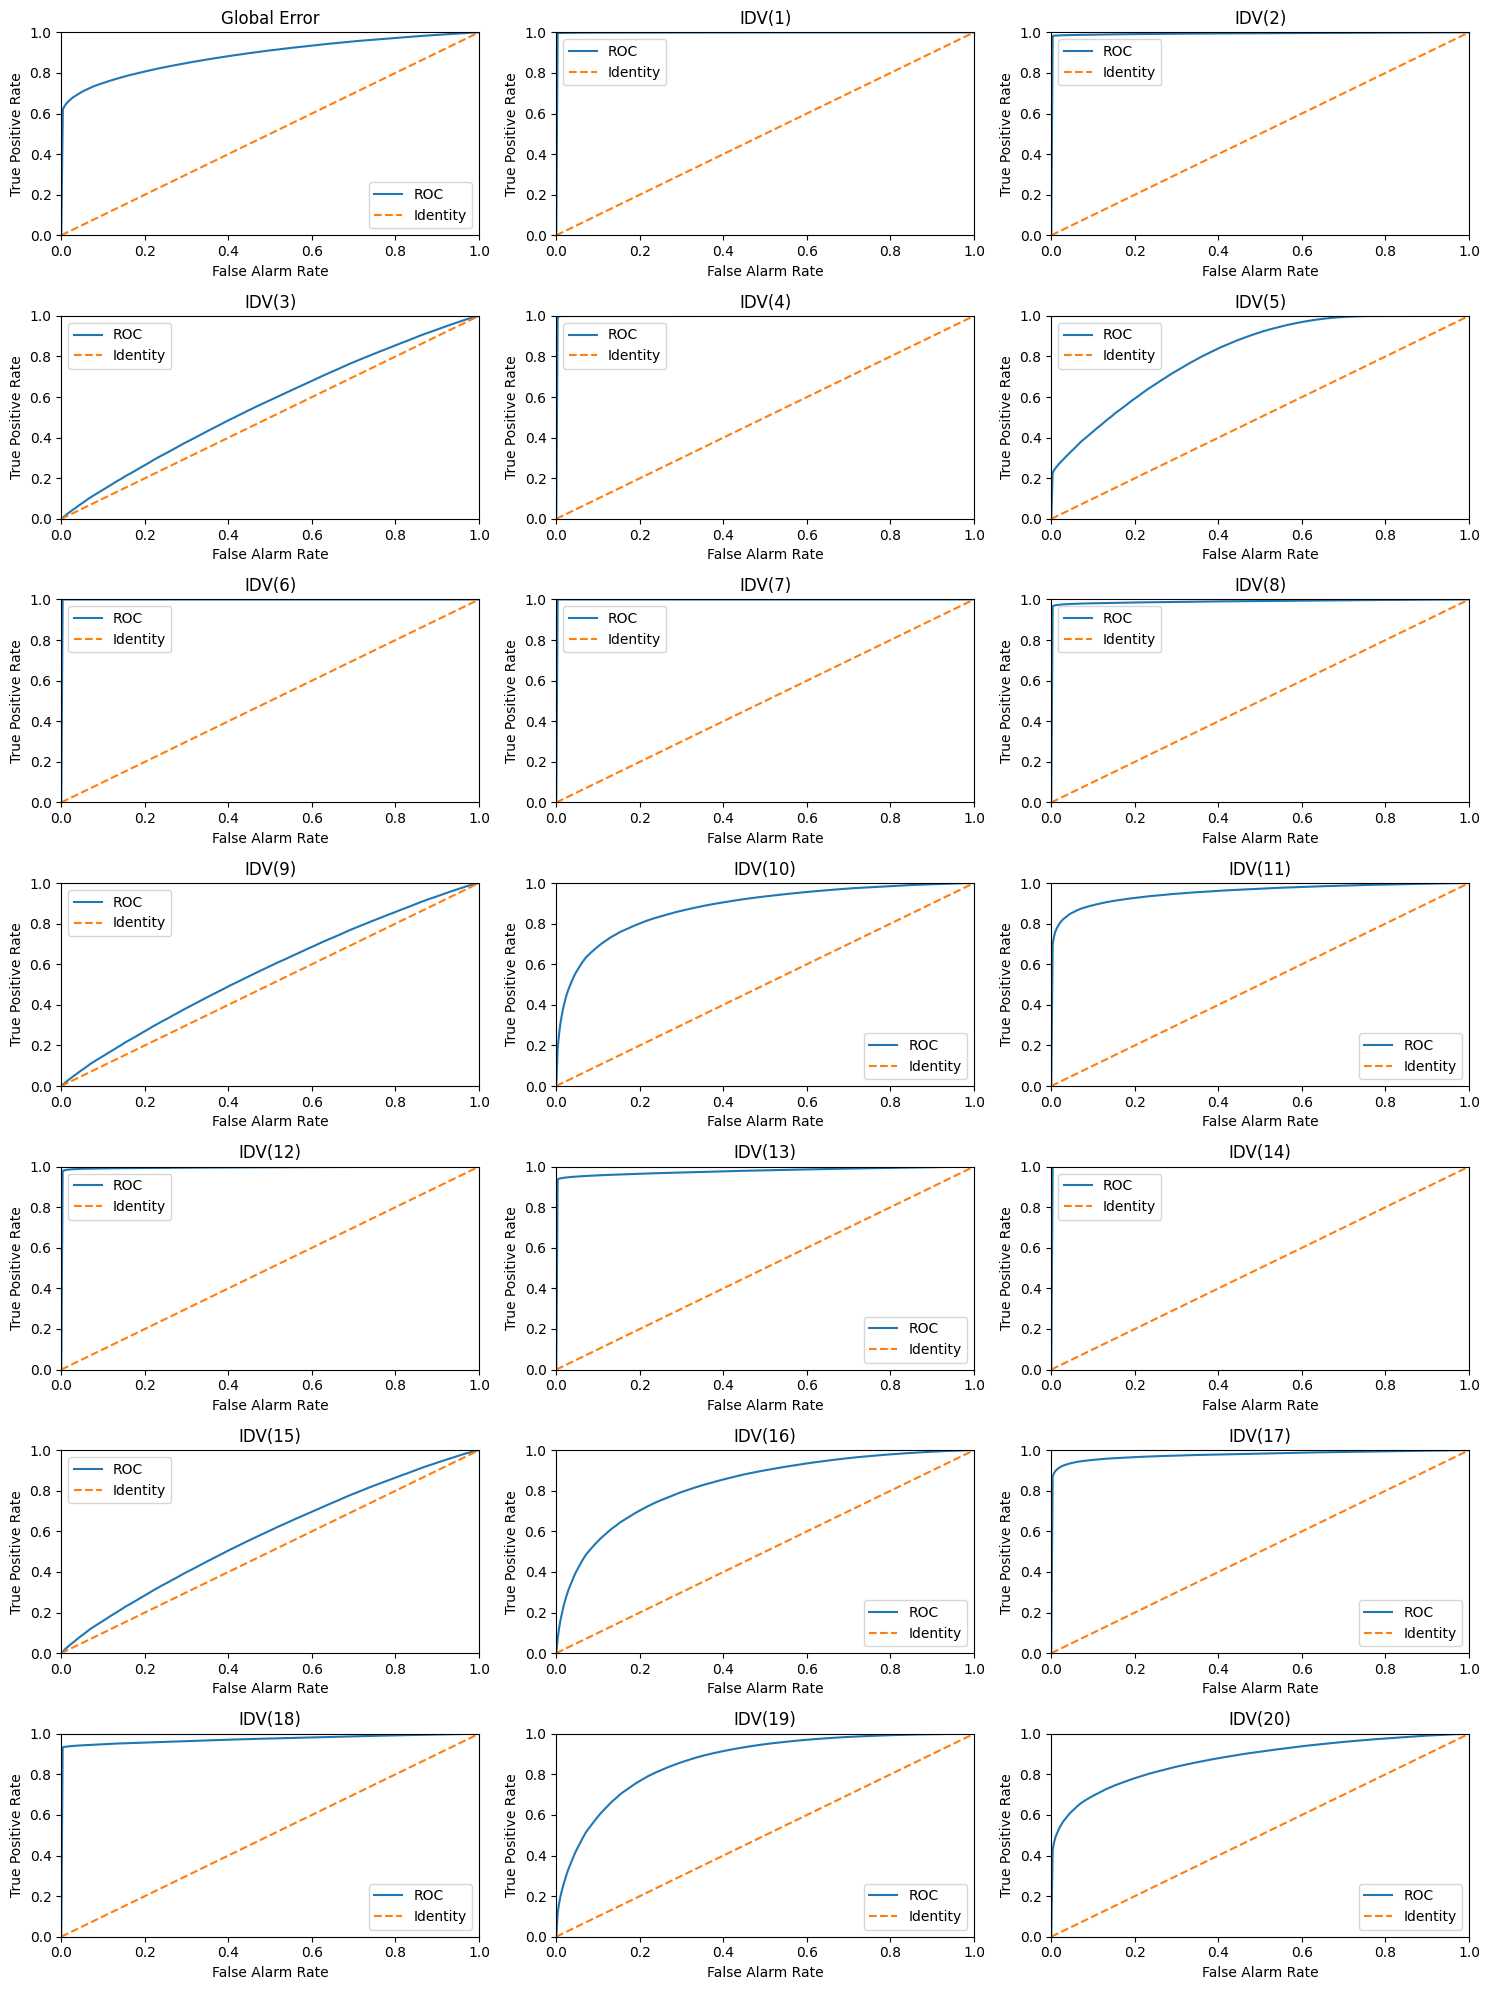

In [60]:
plot_all_roc_curves(result_pls["roc_data"])

In [61]:
print(result_pls["roc_data"]["global"]["False Alarm Rate"][-2])
print(result_pls["roc_data"]["global"]["Fault Detection Rate"][-2])
print(model_pca.thresholds[-2])


0.003755769230769231
0.619885125
(16.542185733766306, 35.70369963869645)


In [62]:
model_pca.J_th_T2, model_pca.J_th_T2

(33.41002735899585, 33.41002735899585)

In [63]:
from sklearn.metrics import roc_curve

In [64]:
indicators = model_pca.compute_indicators(x_test)

In [65]:
fpr, tpr, _= roc_curve(expected_fault,indicators[0])
fpr2, tpr2, _= roc_curve(expected_fault,indicators[1])

In [83]:
ind0_vals = np.sort(indicators[0])[::len(indicators[0])//50]
ind1_vals = np.sort(indicators[1])[::len(indicators[1])//50]

In [84]:
from itertools import product


In [85]:
inds_combinations = list(product(ind0_vals, ind1_vals))
roc_results_ = dict()
for idx, (ind0, ind1) in enumerate(inds_combinations):
    print(idx/len(inds_combinations))
    predicted = model_pca.detect_faults(indicators, (ind0,ind1))
    roc_results_[(ind0, ind1)] = BaseFaultDetectionAlgorithm.compute_error_metrics(predicted,expected_fault)

0.0
0.0004
0.0008
0.0012
0.0016
0.002
0.0024
0.0028
0.0032
0.0036
0.004
0.0044
0.0048
0.0052
0.0056
0.006
0.0064
0.0068
0.0072
0.0076
0.008
0.0084
0.0088
0.0092
0.0096
0.01
0.0104
0.0108
0.0112
0.0116
0.012
0.0124
0.0128
0.0132
0.0136
0.014
0.0144
0.0148
0.0152
0.0156
0.016
0.0164
0.0168
0.0172
0.0176
0.018
0.0184
0.0188
0.0192
0.0196
0.02
0.0204
0.0208
0.0212
0.0216
0.022
0.0224
0.0228
0.0232
0.0236
0.024
0.0244
0.0248
0.0252
0.0256
0.026
0.0264
0.0268
0.0272
0.0276
0.028
0.0284
0.0288
0.0292
0.0296
0.03
0.0304
0.0308
0.0312
0.0316
0.032
0.0324
0.0328
0.0332
0.0336
0.034
0.0344
0.0348
0.0352
0.0356
0.036
0.0364
0.0368
0.0372
0.0376
0.038
0.0384
0.0388
0.0392
0.0396
0.04
0.0404
0.0408
0.0412
0.0416
0.042
0.0424
0.0428
0.0432
0.0436
0.044
0.0444
0.0448
0.0452
0.0456
0.046
0.0464
0.0468
0.0472
0.0476
0.048
0.0484
0.0488
0.0492
0.0496
0.05
0.0504
0.0508
0.0512
0.0516
0.052
0.0524
0.0528
0.0532
0.0536
0.054
0.0544
0.0548
0.0552
0.0556
0.056
0.0564
0.0568
0.0572
0.0576
0.058
0.0584
0.0588
0

In [86]:
fdr = [err_met["Fault Detection Rate"] for err_met in roc_results_.values()]
far = [err_met["False Alarm Rate"] for err_met in roc_results_.values()]

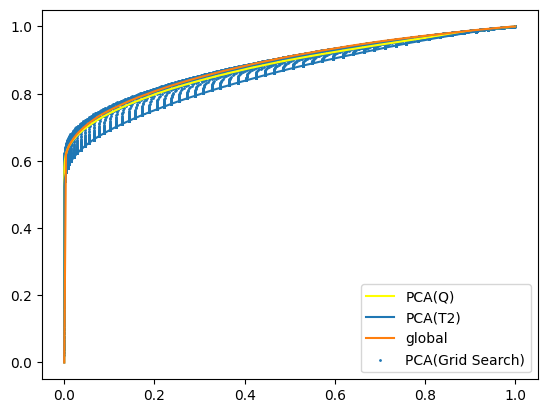

In [82]:
plt.plot(fpr, tpr, label= "PCA(Q)",c="yellow")
plt.plot(fpr2, tpr2, label= "PCA(T2)")
plt.plot(result_pls_["roc_data"]["global"]["False Alarm Rate"], result_pls_["roc_data"]["global"]["Fault Detection Rate"], label= "global")
plt.scatter(far, fdr, label= "PCA(Grid Search)", s=1)
plt.legend()


In [ ]:
plt.scatter()